In [23]:
import keras
import numpy as np

# Exploring the data

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [2]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [33]:
print(train_labels[0])

3


In [20]:
len(test_data)

2246

In [5]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 1us/step


In [10]:
reverse_word_index = dict([(index, key) for key, index in word_index.items()])

In [18]:
' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# Preparing the data

In [34]:
def vectorize_data(sequences):
    res = np.zeros((len(sequences), 10000))
    for idx, val in enumerate(sequences):
        res[idx, val] = 1.
    return res

x_train = vectorize_data(train_data[:-2000])
x_val = vectorize_data(train_data[-2000:])
x_test = vectorize_data(test_data)

In [36]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

6982
2000
2246


In [38]:
from keras.utils import to_categorical

In [39]:
y_train = to_categorical(train_labels[:-2000])
y_val = to_categorical(train_labels[-2000:])
y_test = to_categorical(test_labels)

In [45]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Building the model

In [46]:
from keras.models import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [51]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
hist=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_val, y_val))

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 3s 397us/step - loss: 2.2209 - acc: 0.5332 - val_loss: 1.4718 - val_acc: 0.6950
Epoch 2/20
6982/6982 [==============================] - 0s 43us/step - loss: 1.2307 - acc: 0.7347 - val_loss: 1.1934 - val_acc: 0.7360
Epoch 3/20
6982/6982 [==============================] - 0s 45us/step - loss: 0.9026 - acc: 0.8066 - val_loss: 1.0602 - val_acc: 0.7670
Epoch 4/20
6982/6982 [==============================] - 0s 43us/step - loss: 0.6736 - acc: 0.8549 - val_loss: 1.0738 - val_acc: 0.7455
Epoch 5/20
6982/6982 [==============================] - 0s 43us/step - loss: 0.5074 - acc: 0.8911 - val_loss: 0.9833 - val_acc: 0.7830
Epoch 6/20
6982/6982 [==============================] - 0s 43us/step - loss: 0.3803 - acc: 0.9198 - val_loss: 0.9504 - val_acc: 0.7930
Epoch 7/20
6982/6982 [==============================] - 0s 43us/step - loss: 0.2938 - acc: 0.9350 - val_loss: 0.9345 - val_acc: 0.7890
Epoch 

# Visualize Results

In [55]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

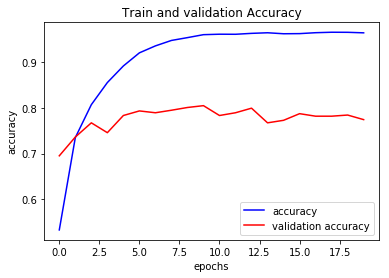

In [61]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
x = range(len(acc))
val_acc = hist.history['val_acc']
plt.plot(x, acc, 'b', label='accuracy')
plt.plot(x, val_acc, 'r', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Train and validation Accuracy')
plt.legend()

In [64]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 59us/step


[1.4138583867335468, 0.767586821015138]